<a href="https://colab.research.google.com/github/Rkankam24/FreeCodeCampCerti/blob/main/MedicalDataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/main/medical_examination.csv

--2025-09-26 08:12:21--  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/main/medical_examination.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941521 (2.8M) [text/plain]
Saving to: ‘medical_examination.csv’

medical_examination 100%[===================>]   2.80M  --.-KB/s    in 0.04s   

2025-09-26 08:12:21 (66.4 MB/s) - ‘medical_examination.csv’ saved [2941521/2941521]



In [2]:
import pandas as pd
df = pd.read_csv('medical_examination.csv')
print(df.head())

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


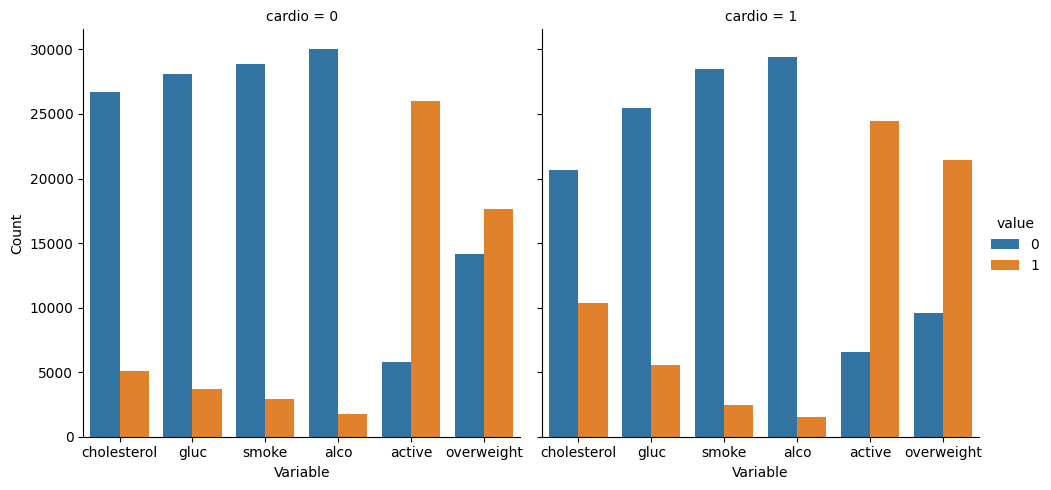

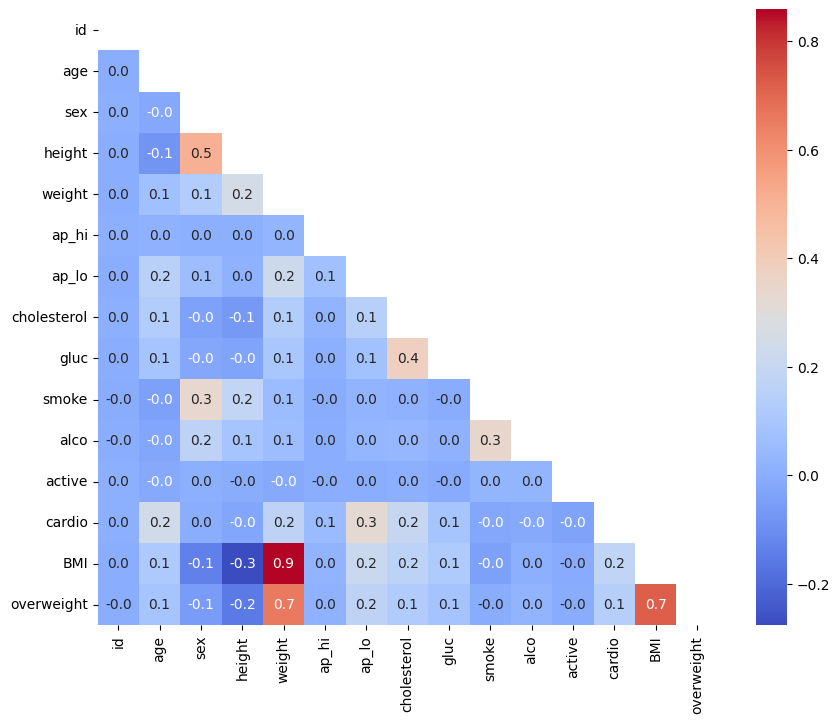

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Calculate BMI
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

# Normalize data
df['overweight'] = (df['BMI'] > 25).astype(int)
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# Clean data
df = df[(df['ap_lo'] <= df['ap_hi'])]
df = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

# Draw Catplot
cat_columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
fig = sns.catplot(x='variable', hue='value', col='cardio', data=pd.melt(df, value_vars=cat_columns, id_vars=['cardio']), kind='count')
fig.set_axis_labels('Variable', 'Count')
plt.show()

# Draw Heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()